<a href="https://colab.research.google.com/github/Youjian-Huang/ALY_6110_Assignment/blob/main/Module_4_Assignment_%E2%80%94_Practice_with_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [22]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, stddev, min, max, col, corr, avg
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load data into a DataFrame
file_path = "/BostonHousing-1.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
# Create a temporary view for Spark SQL queries
df.createOrReplaceTempView("BostonHousing_1")

# Task1: Data Overview

In [25]:
# Retrieve and display the first 5 rows of the dataset to get a sense of the data's structure.
spark.sql("SELECT * FROM BostonHousing_1").show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [26]:
# Find and report the total number of records in the dataset.
spark.sql("SELECT COUNT(*) AS total_records FROM BostonHousing_1").collect()

[Row(total_records=506)]

# Task2: Descriptive Statistics

In [27]:
# Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column
stats = df.select(
         mean("medv").alias("mean_medv"),
         stddev("medv").alias("sd_medv"),
         min("medv").alias("min_medv"),
         max("medv").alias("max_medv")
         ).collect()[0]
# Display basic statistics of the "medv"
print(f"Mean of medv: {stats['mean_medv']}")
print(f"Standard Deviation of medv: {stats['sd_medv']}")
print(f"Min Value of medv: {stats['min_medv']}")
print(f"Max Value of medv: {stats['max_medv']}")

Mean of medv: 22.532806324110698
Standard Deviation of medv: 9.197104087379815
Min Value of medv: 5.0
Max Value of medv: 50.0


In [28]:
# Calculate and display the mean "rm" (average number of rooms per dwelling)
mean_rm = df.select(
          mean("rm").alias("mean_rm")
          ).collect()[0]
# Display the mean of the "rm" column
print(f"Mean of rm: {mean_rm}")

Mean of rm: Row(mean_rm=6.284634387351787)


# Task 3: Data Exploration

In [29]:
# Identify the property with the highest crime rate ("crim")
max_crim_value = df.select(max("crim")).collect()[0][0]
max_crim_property = df.filter(col("crim") == max_crim_value)
# Provide details about this property
max_crim_property.show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [30]:
# Find and report the property with the lowest median home value ("medv"). Include its details.
lowest_medv_value = df.select(min("medv")).collect()[0][0]
lowest_medv_rows = df.filter(col("medv") == lowest_medv_value)
# Include its details.
lowest_medv_rows.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



# Task 4: Data Distribution Analysis

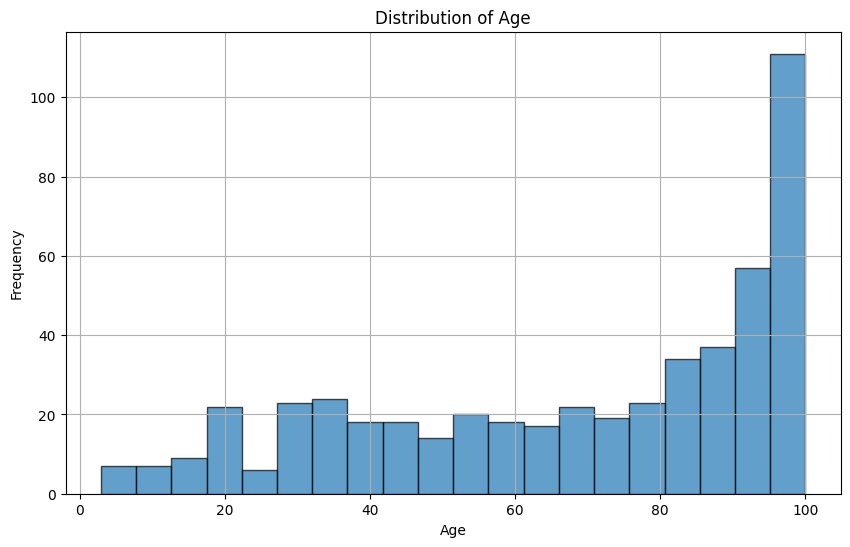

In [31]:
# Create a histogram showing the distribution of the "age" column.
# Import matplotlib libarary
import matplotlib.pyplot as plt
# Convert column "age" to Pandas DataFrame
age_df = df.select("age").toPandas()
# Create histogram for "age"
plt.figure(figsize=(10, 6))
plt.hist(age_df['age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
# Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).

# Calculate the number of properties with "chas" = 1
num_chas_1 = df.filter(col("chas") == 1).count()
# Calculate the percentage of properties with "chas" = 1
percentage_chas_1 = (num_chas_1 / df.count()) * 100
print(f"{percentage_chas_1:.2f}%")

6.92%


# Task 5: Correlation Analysis

In [33]:
# Calculate the correlation coefficient between "rm" and "medv." Explain the relationship between the average number
# of rooms and median home value.
correlation_coeff1 = df.select(corr("rm", "medv")).first()[0]
print(f"{correlation_coeff1:.2f}")


0.70


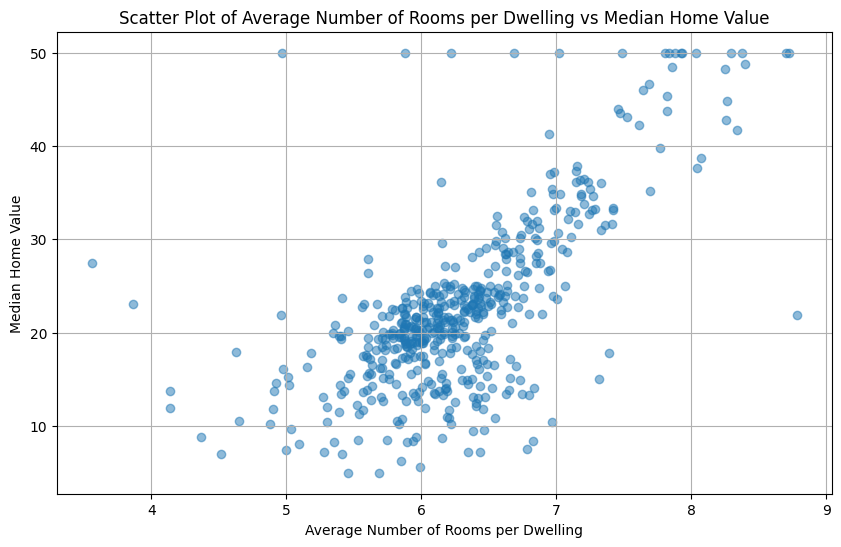

In [34]:
# Convert DataFrame to Pandas DataFrame for plotting
pandas_df1 = df.select("rm", "medv").toPandas()
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df1['rm'], pandas_df1['medv'], alpha=0.5)
plt.title('Scatter Plot of Average Number of Rooms per Dwelling vs Median Home Value')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

In [35]:
# Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and
# "nox" (nitrogen oxide concentration). Report your findings.
correlation_coeff2 = df.select(corr("ptratio", "nox")).first()[0]
print(f"{correlation_coeff2:.2f}")


0.19


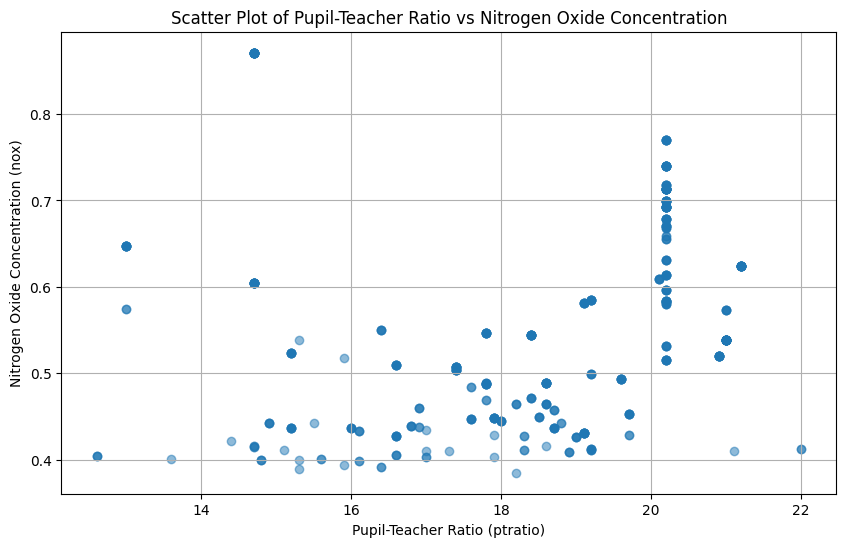

In [36]:
# Convert DataFrame to Pandas DataFrame for plotting
pandas_df2 = df.select("ptratio", "nox").toPandas()
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df2['ptratio'], pandas_df2['nox'], alpha=0.5)
plt.title('Scatter Plot of Pupil-Teacher Ratio vs Nitrogen Oxide Concentration')
plt.xlabel('Pupil-Teacher Ratio (ptratio)')
plt.ylabel('Nitrogen Oxide Concentration (nox)')
plt.grid(True)
plt.show()

# Task 6: Advanced Querying

In [37]:
# Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").
top_5_neighborhoods = df.orderBy(df.medv.desc()).limit(5)
top_5_neighborhoods.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [38]:
# Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.

# Calculate the average age for neighborhoods with "chas" = 1
avg_age_chas_1 = df.filter(col("chas") == 1).select(avg("age")).first()[0]
# Calculate the average age for neighborhoods with "chas" = 0
avg_age_chas_0 = df.filter(col("chas") == 0).select(avg("age")).first()[0]

# Display the results
print(f"Average property age for neighborhoods with 'chas' = 1: {avg_age_chas_1:.2f} years")
print(f"Average property age for neighborhoods with 'chas' = 0: {avg_age_chas_0:.2f} years")

Average property age for neighborhoods with 'chas' = 1: 77.50 years
Average property age for neighborhoods with 'chas' = 0: 67.91 years


# Task 7: Visualization

In [39]:
# Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.
# Create a temporary view for Spark SQL queries
df.createOrReplaceTempView("temp_BostonHousing_1")
# Use the Hive database (if not default)
spark.sql("USE default")

# Create a table
spark.sql("CREATE TABLE IF NOT EXISTS boston_housing_permanent AS SELECT * FROM temp_BostonHousing_1")

# Create the Hive view
spark.sql("""
    CREATE VIEW IF NOT EXISTS property_age_view AS
    SELECT age, medv
    FROM boston_housing_permanent
""")

# Verify the view
property_age_view = spark.sql("SELECT * FROM property_age_view")
property_age_view.show()


+-----+----+
|  age|medv|
+-----+----+
| 65.2|24.0|
| 78.9|21.6|
| 61.1|34.7|
| 45.8|33.4|
| 54.2|36.2|
| 58.7|28.7|
| 66.6|22.9|
| 96.1|27.1|
|100.0|16.5|
| 85.9|18.9|
| 94.3|15.0|
| 82.9|18.9|
| 39.0|21.7|
| 61.8|20.4|
| 84.5|18.2|
| 56.5|19.9|
| 29.3|23.1|
| 81.7|17.5|
| 36.6|20.2|
| 69.5|18.2|
+-----+----+
only showing top 20 rows



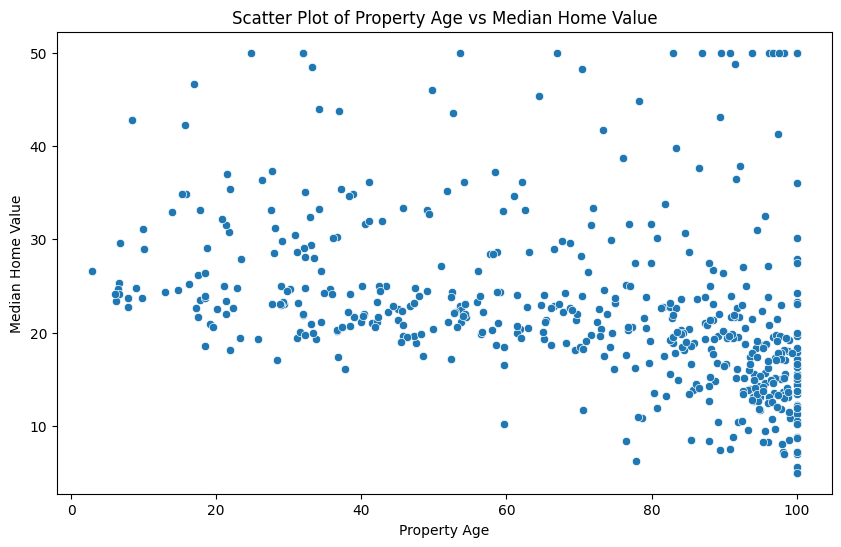

In [40]:
# Plot a scatter plot of property age against median home value using a data visualization tool of your choice.

# Select relevant columns and convert to Pandas DataFrame
pandas_df3 = df.select("age", "medv").toPandas()

# Plot a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pandas_df3, x="age", y="medv")
plt.title("Scatter Plot of Property Age vs Median Home Value")
plt.xlabel("Property Age")
plt.ylabel("Median Home Value")
plt.show()

# Task 8: Outliers Detection

In [41]:
# Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).

outliers_df = spark.sql("SELECT * FROM BostonHousing_1 WHERE crim > 10")
outliers_df.show()
outliers_df.count()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

54

In [ ]:
# Discuss the significance of detecting outliers in data analysis.

# Task 9: Hypothesis Testing (20 minutes)

In [23]:
# Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.

# Null Hypothesis(H0): There is no significant relationship between the average number of rooms and median home value.
# Alternative Hypothesis(H1): There is a statistically significant relationship between the average number of rooms and median home value.


In [46]:
# Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.
from scipy import stats

query = """
    SELECT rm, medv
    FROM BostonHousing_1
"""
# Execute query and fetch data into a Spark DataFrame
df_hy = spark.sql(query)

# Calculate correlation coefficient
corr_coeff = df_hy.stat.corr('rm', 'medv')
print(f"Correlation Coefficient: {corr_coeff:.2f} ")

# Perform hypothesis test
alpha = 0.05  # significance level
if corr_coeff != 0:
    n = df_hy.count()
    dof = n - 2

    # Calculate t-statistic
    t_stat = corr_coeff * ((n - 2) ** 0.5) / ((1 - corr_coeff ** 2) ** 0.5)

    # Calculate p-value
    p_value = stats.t.sf(abs(t_stat), df=dof) * 2

    print(f"t-statistic: {t_stat}")
    print(f"Degrees of freedom: {dof}")
    print(f"P-value: {p_value}")

    # Compare p-value with significance level
    if p_value < alpha:
        print("Reject the null hypothesis: There is a statistically significant relationship between the average number of rooms and median home value.")
    else:
        print("Fail to reject the null hypothesis: There is no statistically significant relationship between the average number of rooms and median home value.")
else:
    print("Correlation coefficient is zero, indicating no linear relationship.")


Correlation Coefficient: 0.70 
t-statistic: 21.7220335115382
Degrees of freedom: 504
P-value: 2.487228871006464e-74
Reject the null hypothesis: There is a statistically significant relationship between the average number of rooms and median home value.
